<a href="https://colab.research.google.com/github/AxbutayevIlhom/1-dastur/blob/main/SLR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning.

#Sample Linear Regression 

Regression ning qanday ishlashini tushinib olamiz.

Regression ning turlari

*   Simple (sodda) regression
       *  Simple Linear Regression
       *  Simple non-linear Regression 
*   Multiple regression
       *  Multiple linear regression
       *  Multiple non-linear regression



In [ ]:
# kerakli kutubxonalarni chaqirib olamiz
import numpy as np
import pandas as pd

In [ ]:
# bizga kerakli datani chaqirib olamiz
df=pd.read_csv("https://raw.githubusercontent.com/JamshidSalimov/Ai-Fayls/master/housing_LR.csv", index_col=0,)
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7460,Яшнободский,1,38.0,5,5,24500.0
7461,Яшнободский,2,49.0,1,4,32000.0
7462,Шайхантахурский,2,64.0,3,9,40000.0
7463,Мирзо-Улугбекский,1,18.0,1,4,11000.0


**Ustunlar Tarifi**

*   location - sotilayotgan uy manzili
*   district - uy joylashgan tuman
*   rooms - xonalar soni
*   size - uy maydoni (kv.m)
*   level - uy





Keling qaysi tumanda qanchadan malumot borligini ko'rib chiqamiz

In [ ]:
# bu yerda qaysi tumanda qancha ma'lumot bor ekanligini ko'rib olamiz
df["district"].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

Keling biror Tumanni tanlab olamiz, masalan Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz

In [ ]:
# eng m'lumoti ko'p bo'lgan tummani ajratib olamiz.
housing=df[df["district"]=="Чиланзарский"]
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [ ]:
x=housing["size"].to_numpy()
x
y=housing["price"].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

Keling "price" ustuni qaysi bir ustun bilan eng yuqori manfiy yoki yuqori karilatsiyaga ega ekanligini ko'rib chiqamiz

In [ ]:
# corrwith()
housing.corrwith(housing["price"])

rooms         0.703835
size          0.843639
level         0.138780
max_levels    0.340015
price         1.000000
dtype: float64

In [ ]:
# endi eng yuqori karilatsiyali ustun malumotlarini massiv ko'rinishida ajratib olamiz.


In [ ]:
# "price" ustuning malumotlarini ham ajratib olamiz massiv ko'rinishida.


**Biz yuqorida aytgan edik biz tanlagan ustunlar orasida chiziqli bog'liqlik borligini aniqlab oldik uni vizual ko'rinishda ko'rib olamiz.**

In [ ]:
# biz seaborn kutubxonasini chaqiramiz
# matplotlib va seaborn kutubxonasini chaqirib olamiz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


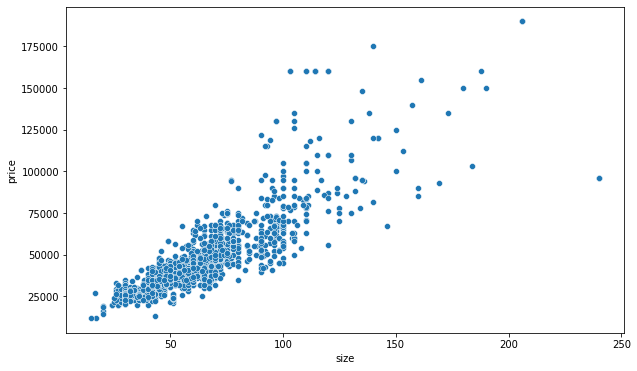

In [ ]:
# grafigni scatterplot() metodi yordamida chizib olamiz
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x="size",y="price")
plt.show()

**O'nga biz taxminiy chiziq tortib ko'ramiz**

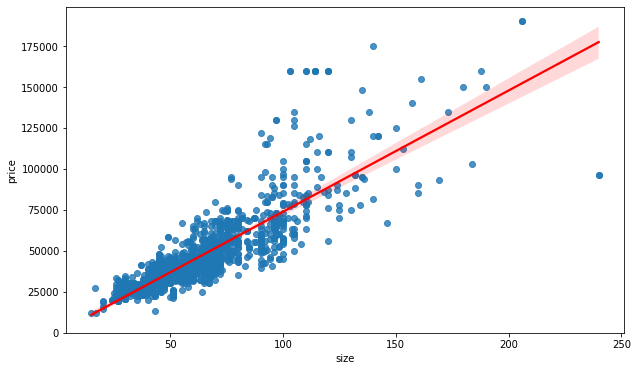

In [ ]:
# regplot line_kws parametiri orqali chiziq tortish.
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x="size",y="price", line_kws={"color":"r"})
plt.show()

<h1>1-Vazifa</h1>



Sizning vazifangiz yuqoridagi X va Y o'zgaruvchilardan quyidagi formuladan foydalangan xolda θ 0 va θ 1 koeffisientlarni hisoblash.

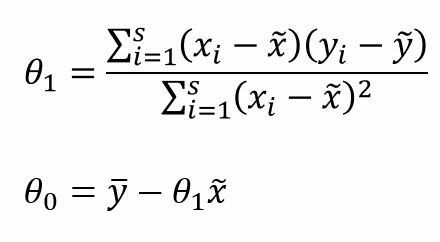

In [ ]:
# X va Y ning qiymatlarini chaqirib olamiz
tetta1=np.sum(np.multiply((x-x.mean()),(y-y.mean())))/(np.sum(np.square(x-x.mean())))
tetta1

740.0264822713249

In [ ]:
# keling biz formuladag x teldani va y teldani topamiz
tetta0=y.mean()-tetta1*x.mean()
tetta0

-195.94911352666531

In [ ]:
# (xi-Xmean) ning quymatlarini topamiz
x

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
# ikkala ayirmadan hosil bo'lgan qiymatlarni bir biriga ko'paytiramiz


In [ ]:
# va ularning yig'indisini topamiz.


In [ ]:
# (xi-Xmean) ning kvadrat ayirmasi quymatlarini topamiz


In [ ]:
# (xi-Xmean) ning kvadrat ayirmasi yig'indisi quymatlarini topamiz


In [ ]:
# tetta1 ni topamiz 

In [ ]:
# tetta1 ni topishning 2-usuli


In [ ]:
# tetta0 ni quymatini ham formulaga asosan topamiz


<h1>2-Vazifa</h1>

X dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi Y ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

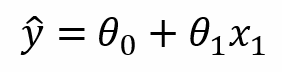

In [ ]:
# sample()


,district,rooms,size,level,max_levels,price
6845,Чиланзарский,2,52.0,2,4,36500.0
887,Чиланзарский,4,92.0,4,4,61000.0
1227,Чиланзарский,4,84.0,4,4,62000.0
2831,Чиланзарский,3,111.0,5,6,85000.0
331,Чиланзарский,4,94.0,4,5,73000.0
2134,Чиланзарский,3,67.0,4,4,35500.0
4338,Чиланзарский,1,32.0,2,4,27000.0
7028,Чиланзарский,3,93.0,4,4,73500.0
4761,Чиланзарский,1,40.0,5,5,25800.0
5296,Чиланзарский,3,67.0,4,4,46000.0


In [ ]:
from pandas.core.common import random_state
# DF ning "size" ustunidan tasodifiy 10 ta qiymatlarni ajratib olamiz va ularning qiymatini massivga utkazamiz.
# random_state() parametiri bilan tanishish. 
# x_train va y_train larni ajratib olamiz.
x_train=housing["size"].sample(10, random_state=42).to_numpy()

y_train=housing["price"].sample(10, random_state=42).to_numpy()
print(x_train)
print(y_train)

[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [ ]:
# topgan tetta0 va tetta1 asosida qiymatlarni bashorat qilib ko'ramiz.
y_pridect=tetta0+x_train*tetta1
y_pridect_int=y_pridect.astype(np.int32)
y_pridect_int[0:10]

array([39765, 30885, 26445, 44205, 35325, 50125, 27925, 47905, 38285,
       32365], dtype=int32)

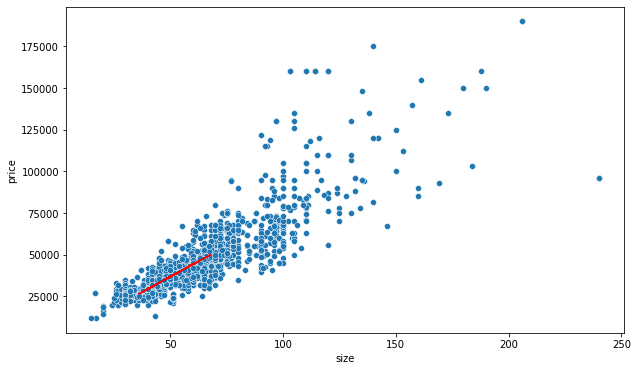

In [ ]:
# plt yordamida tug'ri chiziq grafigini chizish.
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x="size",y="price")
plt.plot(x_train,tetta0+x_train*tetta1, color="r")
plt.show()

<h1>3-Vazifa</h1>

In [ ]:
# MAE va RMSR ni hisoblash. absolute() metodi



Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

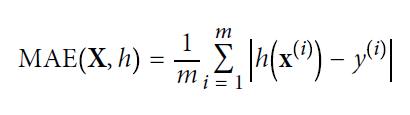

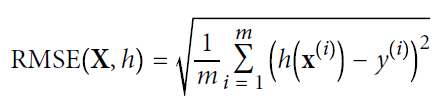

In [ ]:
# MAE (mean absolute error) o'rtacha absalut xatolik 
MAE=np.sum(np.absolute(y_pridect-y_train))/len(y_train)
MAE

4140.3503163471805

In [ ]:
# RMSE (root mean square error) o'rtacha kvadratik xatolik 
